In [1]:
from PIL.Image import fromqimage
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
from utils import ARUCO_DICT
import argparse
import time
from skvideo.io import vread, vwrite
import os 
from skimage.color import rgb2gray
import random

In [2]:
NUM_TAGS = 6

In [3]:
def pose_estimation(frame, aruco_dict_type, matrix_coefficients, distortion_coefficients):

    '''
    frame - Frame from the video stream
    matrix_coefficients - Intrinsic matrix of the calibrated camera
    distortion_coefficients - Distortion coefficients associated with your camera

    return:-
    frame - The frame with the axis drawn on it
    '''
    random.seed(0)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.aruco_dict = cv2.aruco.Dictionary_get(aruco_dict_type)
    parameters = cv2.aruco.DetectorParameters_create()


    corners, ids, rejected_img_points = cv2.aruco.detectMarkers(gray, cv2.aruco_dict,parameters=parameters,
        cameraMatrix=matrix_coefficients,
        distCoeff=distortion_coefficients)
    
#     print(ids)
#     print('corners', len(corners))

    rvecs, tvecs = [], []

        # If markers are detected
    if len(corners) > 0:
#         for i in ids.flatten():
        for i in range(len(corners)):
#             print(i)
            # Estimate pose of each marker and return the values rvec and tvec---(different from those of camera coefficients)
            rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], 0.02, matrix_coefficients,
                                                                       distortion_coefficients)
            # print('rvec', rvec.shape, rvec)
            # print('tvec', tvec.shape, tvec)
            
            # Draw a square around the markers
            cv2.aruco.drawDetectedMarkers(frame, corners) 

            # Draw Axis
            idx = ids.flatten()[i]
            cv2.aruco.drawAxis(frame, matrix_coefficients, distortion_coefficients, rvec, tvec, 0.01)
            rvecs.append(np.hstack((np.array(idx), rvec.flatten())))
            tvecs.append(np.hstack((np.array(idx), tvec.flatten())))  

    return np.array(rvecs), np.array(tvecs), frame

In [4]:
def create_pose_video(video_name, fname, start=0, end=None):
    video = vread(video_name)
    result = []
    if end is None:
        end = len(video)
    for i in range(start, end):
        print('frame', i)
        frame = video[i]
        rvec, tvec, output = pose_estimation(frame, aruco_dict_type, k, d)
        result.append(output)

    result = np.array(result)
    vwrite(fname, result, outputdict={"-pix_fmt":"yuv420p"})

In [5]:
aruco_dict_type = ARUCO_DICT['DICT_4X4_100']
calibration_matrix_path = 'calibration_matrix.npy'
distortion_coefficients_path = 'distortion_coefficients.npy'

In [6]:
k = np.load(calibration_matrix_path)
d = np.load(distortion_coefficients_path)

In [33]:
folder = 'slow_mo'
idx = 15
# create_pose_video(folder + '/' + str(idx) + '.MOV', folder + '_' + str(idx) + '.mp4')
create_pose_video(f'slow_mo/slow_mo_{idx}.MOV', f'slow_mo_{idx}_poses.mp4', start=1175, end=2376)

frame 0
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
frame 52
frame 53
frame 54
frame 55
frame 56
frame 57
frame 58
frame 59
frame 60
frame 61
frame 62
frame 63
frame 64
frame 65
frame 66
frame 67
frame 68
frame 69
frame 70
frame 71
frame 72
frame 73
frame 74
frame 75
frame 76
frame 77
frame 78
frame 79
frame 80
frame 81
frame 82
frame 83
frame 84
frame 85
frame 86
frame 87
frame 88
frame 89
frame 90
frame 91
frame 92
frame 93
frame 94
frame 95
frame 96
frame 97
frame 98
frame 99
frame 100
frame 101
frame 102
frame 103
frame 104
frame 105
frame 106
frame 107
frame 108
frame 109
frame 110


frame 831
frame 832
frame 833
frame 834
frame 835
frame 836
frame 837
frame 838
frame 839
frame 840
frame 841
frame 842
frame 843
frame 844
frame 845
frame 846
frame 847
frame 848
frame 849
frame 850
frame 851
frame 852
frame 853
frame 854
frame 855
frame 856
frame 857
frame 858
frame 859
frame 860
frame 861
frame 862
frame 863
frame 864
frame 865
frame 866
frame 867
frame 868
frame 869
frame 870
frame 871
frame 872
frame 873
frame 874
frame 875
frame 876
frame 877
frame 878
frame 879
frame 880
frame 881
frame 882
frame 883
frame 884
frame 885
frame 886
frame 887
frame 888
frame 889
frame 890
frame 891
frame 892
frame 893
frame 894
frame 895
frame 896
frame 897
frame 898
frame 899
frame 900
frame 901
frame 902
frame 903
frame 904
frame 905
frame 906
frame 907
frame 908
frame 909
frame 910
frame 911
frame 912
frame 913
frame 914
frame 915
frame 916
frame 917
frame 918
frame 919
frame 920
frame 921
frame 922
frame 923
frame 924
frame 925
frame 926
frame 927
frame 928
frame 929
frame 930


frame 1596
frame 1597
frame 1598
frame 1599
frame 1600
frame 1601
frame 1602
frame 1603
frame 1604
frame 1605
frame 1606
frame 1607
frame 1608
frame 1609
frame 1610
frame 1611
frame 1612
frame 1613
frame 1614
frame 1615
frame 1616
frame 1617
frame 1618
frame 1619
frame 1620
frame 1621
frame 1622
frame 1623
frame 1624
frame 1625
frame 1626
frame 1627
frame 1628
frame 1629
frame 1630
frame 1631
frame 1632
frame 1633
frame 1634
frame 1635
frame 1636
frame 1637
frame 1638
frame 1639
frame 1640
frame 1641
frame 1642
frame 1643
frame 1644
frame 1645
frame 1646
frame 1647
frame 1648
frame 1649
frame 1650
frame 1651
frame 1652
frame 1653
frame 1654
frame 1655
frame 1656
frame 1657
frame 1658
frame 1659
frame 1660
frame 1661
frame 1662
frame 1663
frame 1664
frame 1665
frame 1666
frame 1667
frame 1668
frame 1669
frame 1670
frame 1671
frame 1672
frame 1673
frame 1674
frame 1675
frame 1676
frame 1677
frame 1678
frame 1679
frame 1680
frame 1681
frame 1682
frame 1683
frame 1684
frame 1685
frame 1686

frame 2343
frame 2344
frame 2345
frame 2346
frame 2347
frame 2348
frame 2349
frame 2350
frame 2351
frame 2352
frame 2353
frame 2354
frame 2355
frame 2356
frame 2357
frame 2358
frame 2359
frame 2360
frame 2361
frame 2362
frame 2363
frame 2364
frame 2365
frame 2366
frame 2367
frame 2368
frame 2369
frame 2370
frame 2371
frame 2372
frame 2373
frame 2374
frame 2375
frame 2376
frame 2377
frame 2378
frame 2379
frame 2380
frame 2381
frame 2382
frame 2383
frame 2384
frame 2385
frame 2386
frame 2387
frame 2388
frame 2389
frame 2390
frame 2391
frame 2392
frame 2393
frame 2394
frame 2395
frame 2396
frame 2397
frame 2398
frame 2399
frame 2400
frame 2401
frame 2402
frame 2403
frame 2404
frame 2405
frame 2406
frame 2407
frame 2408
frame 2409
frame 2410
frame 2411
frame 2412
frame 2413
frame 2414
frame 2415
frame 2416
frame 2417
frame 2418
frame 2419
frame 2420
frame 2421
frame 2422
frame 2423
frame 2424
frame 2425
frame 2426
frame 2427
frame 2428
frame 2429
frame 2430
frame 2431
frame 2432
frame 2433

frame 3092
frame 3093
frame 3094
frame 3095
frame 3096
frame 3097
frame 3098
frame 3099
frame 3100
frame 3101
frame 3102
frame 3103
frame 3104
frame 3105
frame 3106
frame 3107
frame 3108
frame 3109
frame 3110
frame 3111
frame 3112
frame 3113
frame 3114
frame 3115
frame 3116
frame 3117
frame 3118
frame 3119
frame 3120
frame 3121
frame 3122
frame 3123
frame 3124
frame 3125
frame 3126
frame 3127
frame 3128
frame 3129
frame 3130
frame 3131
frame 3132
frame 3133
frame 3134
frame 3135
frame 3136
frame 3137
frame 3138
frame 3139
frame 3140
frame 3141
frame 3142
frame 3143
frame 3144
frame 3145
frame 3146
frame 3147
frame 3148
frame 3149
frame 3150
frame 3151
frame 3152
frame 3153
frame 3154
frame 3155
frame 3156
frame 3157
frame 3158
frame 3159
frame 3160
frame 3161
frame 3162
frame 3163
frame 3164
frame 3165
frame 3166
frame 3167
frame 3168
frame 3169
frame 3170
frame 3171
frame 3172
frame 3173
frame 3174
frame 3175
frame 3176
frame 3177
frame 3178
frame 3179
frame 3180
frame 3181
frame 3182

In [9]:
def get_rvecs_tvecs(video, start=0, end=None, save_vid=False, fname='output.mp4'):
    rvecs, tvecs = [], []
    if end is None:
        end = len(video)
    if save_vid:
        results = []
    for i in range(start, end):
        print('frame', i)
        frame = video[i]
        rvec, tvec, output = pose_estimation(frame, aruco_dict_type, k, d)
        rvecs.append(rvec)
        tvecs.append(tvec)
        if save_vid:
            results.append(output)
    print('video length:', len(video))
    print('rvecs length:', len(rvecs))
    print('tvecs length:', len(tvecs))
    if save_vid:
        results = np.array(results)
        vwrite(fname, results, outputdict={"-pix_fmt":"yuv420p"})
    return rvecs, tvecs 

In [10]:
def get_frames_dict(tvecs):
    frames_dict = {}
    for tvec in tvecs:
        count = frames_dict.get(len(tvec), 0)
        frames_dict[len(tvec)] = count + 1
    return frames_dict 

In [32]:
for i in range(start, end):
    frames_dict = get_frames_dict(tvecs_dict[i])
    print(i, frames_dict)
    count = 0
    for key in frames_dict:
        count += frames_dict[key]
    print(frames_dict[NUM_TAGS]/count)

12 {1: 51, 0: 34, 2: 12, 3: 6, 4: 5, 5: 126, 6: 2156, 7: 64}
0.8785656071719642
13 {5: 908, 6: 2117, 4: 23, 7: 6}
0.6931892599869024
14 {4: 58, 5: 425, 6: 2056, 7: 16}
0.8046966731898239
15 {6: 3466, 5: 157, 4: 4}
0.9556106975461814
16 {6: 2543, 5: 153, 4: 2, 7: 16}
0.9369933677229182


In [ ]:
horizons = [100, 200]
vec_dicts = {}
for horizon in horizons:
    for i in range(3):
        video_name = f'slow_mo_new/{horizon}/{i}.MOV'
        video = vread(video_name)
        rvecs, tvecs = get_rvecs_tvecs(video)
        vec_dicts[video_name] = (rvecs, tvecs)

frame 0
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
frame 52
frame 53
frame 54
frame 55
frame 56
frame 57
frame 58
frame 59
frame 60
frame 61
frame 62
frame 63
frame 64
frame 65
frame 66
frame 67
frame 68
frame 69
frame 70
frame 71
frame 72
frame 73
frame 74
frame 75
frame 76
frame 77
frame 78
frame 79
frame 80
frame 81
frame 82
frame 83
frame 84
frame 85
frame 86
frame 87
frame 88
frame 89
frame 90
frame 91
frame 92
frame 93
frame 94
frame 95
frame 96
frame 97
frame 98
frame 99
frame 100
frame 101
frame 102
frame 103
frame 104
frame 105
frame 106
frame 107
frame 108
frame 109
frame 110


frame 837
frame 838
frame 839
frame 840
frame 841
frame 842
frame 843
frame 844
frame 845
frame 846
frame 847
frame 848
frame 849
frame 850
frame 851
frame 852
frame 853
frame 854
frame 855
frame 856
frame 857
frame 858
frame 859
frame 860
frame 861
frame 862
frame 863
frame 864
frame 865
frame 866
frame 867
frame 868
frame 869
frame 870
frame 871
frame 872
frame 873
frame 874
frame 875
frame 876
frame 877
frame 878
frame 879
frame 880
frame 881
frame 882
frame 883
frame 884
frame 885
frame 886
frame 887
frame 888
frame 889
frame 890
frame 891
frame 892
frame 893
frame 894
frame 895
frame 896
frame 897
frame 898
frame 899
frame 900
frame 901
frame 902
frame 903
frame 904
frame 905
frame 906
frame 907
frame 908
frame 909
frame 910
frame 911
frame 912
frame 913
frame 914
frame 915
frame 916
frame 917
frame 918
frame 919
frame 920
frame 921
frame 922
frame 923
frame 924
frame 925
frame 926
frame 927
frame 928
frame 929
frame 930
frame 931
frame 932
frame 933
frame 934
frame 935
frame 936


frame 1597
frame 1598
frame 1599
frame 1600
frame 1601
frame 1602
frame 1603
frame 1604
frame 1605
frame 1606
frame 1607
frame 1608
frame 1609
frame 1610
frame 1611
frame 1612
frame 1613
frame 1614
frame 1615
frame 1616
frame 1617
frame 1618
frame 1619
frame 1620
frame 1621
frame 1622
frame 1623
frame 1624
frame 1625
frame 1626
frame 1627
frame 1628
frame 1629
frame 1630
frame 1631
frame 1632
frame 1633
frame 1634
frame 1635
frame 1636
frame 1637
frame 1638
frame 1639
frame 1640
frame 1641
frame 1642
frame 1643
frame 1644
frame 1645
frame 1646
frame 1647
frame 1648
frame 1649
frame 1650
frame 1651
frame 1652
frame 1653
frame 1654
frame 1655
frame 1656
frame 1657
frame 1658
frame 1659
frame 1660
frame 1661
frame 1662
frame 1663
frame 1664
frame 1665
frame 1666
frame 1667
frame 1668
frame 1669
frame 1670
frame 1671
frame 1672
frame 1673
frame 1674
frame 1675
frame 1676
frame 1677
frame 1678
frame 1679
frame 1680
frame 1681
frame 1682
frame 1683
frame 1684
frame 1685
frame 1686
frame 1687

frame 2347
frame 2348
frame 2349
frame 2350
frame 2351
frame 2352
frame 2353
frame 2354
frame 2355
frame 2356
frame 2357
frame 2358
frame 2359
frame 2360
frame 2361
frame 2362
frame 2363
frame 2364
frame 2365
frame 2366
frame 2367
frame 2368
frame 2369
frame 2370
frame 2371
frame 2372
frame 2373
frame 2374
frame 2375
frame 2376
frame 2377
frame 2378
frame 2379
frame 2380
frame 2381
frame 2382
frame 2383
frame 2384
frame 2385
frame 2386
frame 2387
frame 2388
frame 2389
frame 2390
frame 2391
frame 2392
frame 2393
frame 2394
frame 2395
frame 2396
frame 2397
frame 2398
frame 2399
frame 2400
frame 2401
frame 2402
frame 2403
frame 2404
frame 2405
frame 2406
frame 2407
frame 2408
frame 2409
frame 2410
frame 2411
frame 2412
frame 2413
frame 2414
frame 2415
frame 2416
frame 2417
frame 2418
frame 2419
frame 2420
frame 2421
frame 2422
frame 2423
frame 2424
frame 2425
frame 2426
frame 2427
frame 2428
frame 2429
frame 2430
frame 2431
frame 2432
frame 2433
frame 2434
frame 2435
frame 2436
frame 2437

frame 197
frame 198
frame 199
frame 200
frame 201
frame 202
frame 203
frame 204
frame 205
frame 206
frame 207
frame 208
frame 209
frame 210
frame 211
frame 212
frame 213
frame 214
frame 215
frame 216
frame 217
frame 218
frame 219
frame 220
frame 221
frame 222
frame 223
frame 224
frame 225
frame 226
frame 227
frame 228
frame 229
frame 230
frame 231
frame 232
frame 233
frame 234
frame 235
frame 236
frame 237
frame 238
frame 239
frame 240
frame 241
frame 242
frame 243
frame 244
frame 245
frame 246
frame 247
frame 248
frame 249
frame 250
frame 251
frame 252
frame 253
frame 254
frame 255
frame 256
frame 257
frame 258
frame 259
frame 260
frame 261
frame 262
frame 263
frame 264
frame 265
frame 266
frame 267
frame 268
frame 269
frame 270
frame 271
frame 272
frame 273
frame 274
frame 275
frame 276
frame 277
frame 278
frame 279
frame 280
frame 281
frame 282
frame 283
frame 284
frame 285
frame 286
frame 287
frame 288
frame 289
frame 290
frame 291
frame 292
frame 293
frame 294
frame 295
frame 296


frame 1018
frame 1019
frame 1020
frame 1021
frame 1022
frame 1023
frame 1024
frame 1025
frame 1026
frame 1027
frame 1028
frame 1029
frame 1030
frame 1031
frame 1032
frame 1033
frame 1034
frame 1035
frame 1036
frame 1037
frame 1038
frame 1039
frame 1040
frame 1041
frame 1042
frame 1043
frame 1044
frame 1045
frame 1046
frame 1047
frame 1048
frame 1049
frame 1050
frame 1051
frame 1052
frame 1053
frame 1054
frame 1055
frame 1056
frame 1057
frame 1058
frame 1059
frame 1060
frame 1061
frame 1062
frame 1063
frame 1064
frame 1065
frame 1066
frame 1067
frame 1068
frame 1069
frame 1070
frame 1071
frame 1072
frame 1073
frame 1074
frame 1075
frame 1076
frame 1077
frame 1078
frame 1079
frame 1080
frame 1081
frame 1082
frame 1083
frame 1084
frame 1085
frame 1086
frame 1087
frame 1088
frame 1089
frame 1090
frame 1091
frame 1092
frame 1093
frame 1094
frame 1095
frame 1096
frame 1097
frame 1098
frame 1099
frame 1100
frame 1101
frame 1102
frame 1103
frame 1104
frame 1105
frame 1106
frame 1107
frame 1108

frame 1766
frame 1767
frame 1768
frame 1769
frame 1770
frame 1771
frame 1772
frame 1773
frame 1774
frame 1775
frame 1776
frame 1777
frame 1778
frame 1779
frame 1780
frame 1781
frame 1782
frame 1783
frame 1784
frame 1785
frame 1786
frame 1787
frame 1788
frame 1789
frame 1790
frame 1791
frame 1792
frame 1793
frame 1794
frame 1795
frame 1796
frame 1797
frame 1798
frame 1799
frame 1800
frame 1801
frame 1802
frame 1803
frame 1804
frame 1805
frame 1806
frame 1807
frame 1808
frame 1809
frame 1810
frame 1811
frame 1812
frame 1813
frame 1814
frame 1815
frame 1816
frame 1817
frame 1818
frame 1819
frame 1820
frame 1821
frame 1822
frame 1823
frame 1824
frame 1825
frame 1826
frame 1827
frame 1828
frame 1829
frame 1830
frame 1831
frame 1832
frame 1833
frame 1834
frame 1835
frame 1836
frame 1837
frame 1838
frame 1839
frame 1840
frame 1841
frame 1842
frame 1843
frame 1844
frame 1845
frame 1846
frame 1847
frame 1848
frame 1849
frame 1850
frame 1851
frame 1852
frame 1853
frame 1854
frame 1855
frame 1856

frame 2515
frame 2516
frame 2517
frame 2518
frame 2519
frame 2520
frame 2521
frame 2522
frame 2523
frame 2524
frame 2525
frame 2526
frame 2527
frame 2528
frame 2529
frame 2530
frame 2531
frame 2532
frame 2533
frame 2534
frame 2535
frame 2536
frame 2537
frame 2538
frame 2539
frame 2540
frame 2541
frame 2542
frame 2543
frame 2544
frame 2545
frame 2546
frame 2547
frame 2548
frame 2549
frame 2550
frame 2551
frame 2552
frame 2553
frame 2554
frame 2555
frame 2556
frame 2557
frame 2558
frame 2559
frame 2560
frame 2561
frame 2562
frame 2563
frame 2564
frame 2565
frame 2566
frame 2567
frame 2568
frame 2569
frame 2570
frame 2571
frame 2572
frame 2573
frame 2574
frame 2575
frame 2576
frame 2577
frame 2578
frame 2579
frame 2580
frame 2581
frame 2582
frame 2583
frame 2584
frame 2585
frame 2586
frame 2587
frame 2588
frame 2589
frame 2590
frame 2591
frame 2592
frame 2593
frame 2594
frame 2595
frame 2596
frame 2597
frame 2598
frame 2599
frame 2600
frame 2601
frame 2602
frame 2603
frame 2604
frame 2605

frame 494
frame 495
frame 496
frame 497
frame 498
frame 499
frame 500
frame 501
frame 502
frame 503
frame 504
frame 505
frame 506
frame 507
frame 508
frame 509
frame 510
frame 511
frame 512
frame 513
frame 514
frame 515
frame 516
frame 517
frame 518
frame 519
frame 520
frame 521
frame 522
frame 523
frame 524
frame 525
frame 526
frame 527
frame 528
frame 529
frame 530
frame 531
frame 532
frame 533
frame 534
frame 535
frame 536
frame 537
frame 538
frame 539
frame 540
frame 541
frame 542
frame 543
frame 544
frame 545
frame 546
frame 547
frame 548
frame 549
frame 550
frame 551
frame 552
frame 553
frame 554
frame 555
frame 556
frame 557
frame 558
frame 559
frame 560
frame 561
frame 562
frame 563
frame 564
frame 565
frame 566
frame 567
frame 568
frame 569
frame 570
frame 571
frame 572
frame 573
frame 574
frame 575
frame 576
frame 577
frame 578
frame 579
frame 580
frame 581
frame 582
frame 583
frame 584
frame 585
frame 586
frame 587
frame 588
frame 589
frame 590
frame 591
frame 592
frame 593


frame 1285
frame 1286
frame 1287
frame 1288
frame 1289
frame 1290
frame 1291
frame 1292
frame 1293
frame 1294
frame 1295
frame 1296
frame 1297
frame 1298
frame 1299
frame 1300
frame 1301
frame 1302
frame 1303
frame 1304
frame 1305
frame 1306
frame 1307
frame 1308
frame 1309
frame 1310
frame 1311
frame 1312
frame 1313
frame 1314
frame 1315
frame 1316
frame 1317
frame 1318
frame 1319
frame 1320
frame 1321
frame 1322
frame 1323
frame 1324
frame 1325
frame 1326
frame 1327
frame 1328
frame 1329
frame 1330
frame 1331
frame 1332
frame 1333
frame 1334
frame 1335
frame 1336
frame 1337
frame 1338
frame 1339
frame 1340
frame 1341
frame 1342
frame 1343
frame 1344
frame 1345
frame 1346
frame 1347
frame 1348
frame 1349
frame 1350
frame 1351
frame 1352
frame 1353
frame 1354
frame 1355
frame 1356
frame 1357
frame 1358
frame 1359
frame 1360
frame 1361
frame 1362
frame 1363
frame 1364
frame 1365
frame 1366
frame 1367
frame 1368
frame 1369
frame 1370
frame 1371
frame 1372
frame 1373
frame 1374
frame 1375

frame 2033
frame 2034
frame 2035
frame 2036
frame 2037
frame 2038
frame 2039
frame 2040
frame 2041
frame 2042
frame 2043
frame 2044
frame 2045
frame 2046
frame 2047
frame 2048
frame 2049
frame 2050
frame 2051
frame 2052
frame 2053
frame 2054
frame 2055
frame 2056
frame 2057
frame 2058
frame 2059
frame 2060
frame 2061
frame 2062
frame 2063
frame 2064
frame 2065
frame 2066
frame 2067
frame 2068
frame 2069
frame 2070
frame 2071
frame 2072
frame 2073
frame 2074
frame 2075
frame 2076
frame 2077
frame 2078
frame 2079
frame 2080
frame 2081
frame 2082
frame 2083
frame 2084
frame 2085
frame 2086
frame 2087
frame 2088
frame 2089
frame 2090
frame 2091
frame 2092
frame 2093
frame 2094
frame 2095
frame 2096
frame 2097
frame 2098
frame 2099
frame 2100
frame 2101
frame 2102
frame 2103
frame 2104
frame 2105
frame 2106
frame 2107
frame 2108
frame 2109
frame 2110
frame 2111
frame 2112
frame 2113
frame 2114
frame 2115
frame 2116
frame 2117
frame 2118
frame 2119
frame 2120
frame 2121
frame 2122
frame 2123

In [ ]:
for key in vec_dicts:
    rvecs, tvecs = vec_dicts[key]
    frames_dict = get_frames_dict(tvecs_dict[i])
    print(key)
    print(frames_dict)
    for key in frames_dict:
        count += frames_dict[key]
    print(frames_dict[NUM_TAGS]/count)

In [7]:
horizon = 100 #duration 
idx = 0
video_name = f'slow_mo_new/{horizon}/{idx}.MOV'
video = vread(video_name)

In [ ]:
rvecs, tvecs = get_rvecs_tvecs(video)

frame 0
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
frame 52
frame 53
frame 54
frame 55
frame 56
frame 57
frame 58
frame 59
frame 60
frame 61
frame 62
frame 63
frame 64
frame 65
frame 66
frame 67
frame 68
frame 69
frame 70
frame 71
frame 72
frame 73
frame 74
frame 75
frame 76
frame 77
frame 78
frame 79
frame 80
frame 81
frame 82
frame 83
frame 84
frame 85
frame 86
frame 87
frame 88
frame 89
frame 90
frame 91
frame 92
frame 93
frame 94
frame 95
frame 96
frame 97
frame 98
frame 99
frame 100
frame 101
frame 102
frame 103
frame 104
frame 105
frame 106
frame 107
frame 108
frame 109
frame 110


frame 833
frame 834
frame 835
frame 836
frame 837
frame 838
frame 839
frame 840
frame 841
frame 842
frame 843
frame 844
frame 845
frame 846
frame 847
frame 848
frame 849
frame 850
frame 851
frame 852
frame 853
frame 854
frame 855
frame 856
frame 857
frame 858
frame 859
frame 860
frame 861
frame 862
frame 863
frame 864
frame 865
frame 866
frame 867
frame 868
frame 869
frame 870
frame 871
frame 872
frame 873
frame 874
frame 875
frame 876
frame 877
frame 878
frame 879
frame 880
frame 881
frame 882
frame 883
frame 884
frame 885
frame 886
frame 887
frame 888
frame 889
frame 890
frame 891
frame 892
frame 893
frame 894
frame 895
frame 896
frame 897
frame 898
frame 899
frame 900
frame 901
frame 902
frame 903
frame 904
frame 905
frame 906
frame 907
frame 908
frame 909
frame 910
frame 911
frame 912
frame 913
frame 914
frame 915
frame 916
frame 917
frame 918
frame 919
frame 920
frame 921
frame 922
frame 923
frame 924
frame 925
frame 926
frame 927
frame 928
frame 929
frame 930
frame 931
frame 932


frame 1595
frame 1596
frame 1597
frame 1598
frame 1599
frame 1600
frame 1601
frame 1602
frame 1603
frame 1604
frame 1605
frame 1606
frame 1607
frame 1608
frame 1609
frame 1610
frame 1611
frame 1612
frame 1613
frame 1614
frame 1615
frame 1616
frame 1617
frame 1618
frame 1619
frame 1620
frame 1621
frame 1622
frame 1623
frame 1624
frame 1625
frame 1626
frame 1627
frame 1628
frame 1629
frame 1630
frame 1631
frame 1632
frame 1633
frame 1634
frame 1635
frame 1636
frame 1637
frame 1638
frame 1639
frame 1640
frame 1641
frame 1642
frame 1643
frame 1644
frame 1645
frame 1646
frame 1647
frame 1648
frame 1649
frame 1650
frame 1651
frame 1652
frame 1653
frame 1654
frame 1655
frame 1656
frame 1657
frame 1658
frame 1659
frame 1660
frame 1661
frame 1662
frame 1663
frame 1664
frame 1665
frame 1666
frame 1667
frame 1668
frame 1669
frame 1670
frame 1671
frame 1672
frame 1673
frame 1674
frame 1675
frame 1676
frame 1677
frame 1678
frame 1679
frame 1680
frame 1681
frame 1682
frame 1683
frame 1684
frame 1685

frame 2341
frame 2342
frame 2343
frame 2344
frame 2345
frame 2346
frame 2347
frame 2348
frame 2349
frame 2350
frame 2351
frame 2352
frame 2353
frame 2354
frame 2355
frame 2356
frame 2357
frame 2358
frame 2359
frame 2360
frame 2361
frame 2362
frame 2363
frame 2364
frame 2365
frame 2366
frame 2367
frame 2368
frame 2369
frame 2370
frame 2371
frame 2372
frame 2373
frame 2374
frame 2375
frame 2376
frame 2377
frame 2378
frame 2379
frame 2380
frame 2381
frame 2382
frame 2383
frame 2384
frame 2385
frame 2386
frame 2387
frame 2388
frame 2389
frame 2390
frame 2391
frame 2392
frame 2393
frame 2394
frame 2395
frame 2396
frame 2397
frame 2398
frame 2399
frame 2400
frame 2401
frame 2402
frame 2403
frame 2404
frame 2405
frame 2406
frame 2407
frame 2408
frame 2409
frame 2410
frame 2411
frame 2412
frame 2413
frame 2414
frame 2415
frame 2416
frame 2417
frame 2418
frame 2419
frame 2420
frame 2421
frame 2422
frame 2423
frame 2424
frame 2425
frame 2426
frame 2427
frame 2428
frame 2429
frame 2430
frame 2431

In [20]:
print(get_frames_dict(tvecs))

{5: 9, 6: 1192}


In [67]:
idx = 15
np.save(f'tvecs_{idx}.txt', tvecs)
np.save(f'rvecs_{idx}.txt', rvecs)

In [26]:
print(idx)

5.0


In [59]:
def get_missing_indices(tvecs, rvecs):
    inds = []
    for i in range(len(tvecs)):
        if len(tvecs[i]) < NUM_TAGS or len(rvecs[i]) < NUM_TAGS:
            inds.append(i)
    return inds 

In [61]:
missing_inds = get_missing_indices(tvecs, rvecs)
print(missing_inds)

[0, 2, 5, 6, 7, 22, 47, 48, 250]


In [24]:
for i in get_missing_indices(tvecs):
    frame_tvecs = tvecs[i]
    ind_tvec_dict = {}
    for j in range(len(frame_tvecs)):
        tvec = frame_tvecs[j]
        idx = tvec[0]
        tvec3d = tvec[1:]
        ind_tvec_dict[idx] = tvec3d
    print(i, ind_tvec_dict.keys())

0 dict_keys([1.0, 2.0, 4.0, 5.0, 0.0])
2 dict_keys([5.0, 1.0, 2.0, 4.0, 0.0])
5 dict_keys([1.0, 2.0, 4.0, 5.0, 0.0])
6 dict_keys([5.0, 1.0, 2.0, 4.0, 0.0])
7 dict_keys([1.0, 2.0, 4.0, 5.0, 0.0])
22 dict_keys([1.0, 2.0, 4.0, 5.0, 0.0])
47 dict_keys([1.0, 2.0, 4.0, 5.0, 0.0])
48 dict_keys([1.0, 2.0, 4.0, 5.0, 0.0])
250 dict_keys([2.0, 3.0, 0.0, 4.0, 5.0])


In [29]:
frame_rvecs = rvecs[0]
print(frame_rvecs)
rvec = frame_rvecs[0]
print(rvec)
print(np.hstack((np.array(0), rvec)))
print(rvec[1:])

[[ 1.         -2.2686698   1.58122174  0.09794417]
 [ 2.         -2.25256584  2.31505356  0.17437837]
 [ 4.         -2.93911419  1.07566091 -0.05940636]
 [ 5.         -3.17674638  0.2544992  -0.15006564]
 [ 0.         -2.04507843  2.17866613 -0.1886454 ]]
[ 1.         -2.2686698   1.58122174  0.09794417]
[ 0.          1.         -2.2686698   1.58122174  0.09794417]
[-2.2686698   1.58122174  0.09794417]


In [38]:
print(frame_rvecs.shape)
print(frame_rvecs[0].shape)

(5, 4)
(4,)


In [63]:
def get_running_mean(vecs, missing_inds, tvecs_or_rvecs=True, smooth=False):
    def get_ind_vec_dict(frame_vecs):
        ind_vec_dict = {}
        for i in range(len(frame_vecs)):
            vec = frame_vecs[i]
            idx = vec[0]
            vec3d = tvec[1:]
            ind_vec_dict[idx] = vec3d
        return ind_vec_dict
            
    for i in missing_inds:
        frame_vecs = vecs[i]
        prev_dict = None
        
        j = i - 1
        while j > 0:
            if len(vecs[j]) < NUM_TAGS:
                j -= 1
            else:
                prev_dict = get_ind_vec_dict(vecs[j])
                break 
        next_dict = None
        
        j = i + 1
        while j < len(tvecs):
            if len(vecs[j]) == NUM_TAGS:
                next_dict = get_ind_vec_dict(vecs[j])
                break 
            else:
                j += 1
                
        ind_rvec_dict = get_ind_vec_dict(vecs[i])
        for idx in range(NUM_TAGS):
            if idx not in ind_tvec_dict:
                total_sum = np.zeros(3)
                total_count = 0
                if tvecs_or_rvecs:
                    if prev_dict:
                        if tvecs_or_rvecs:
                            total_sum += prev_dict[idx]
                            total_count += 1 
                    if next_dict:
                        if tvecs_or_rvecs:
                            total_sum += next_dict[idx]
                            total_count += 1 
                    vecs[i] = np.vstack((frame_vecs,(np.hstack((np.array(idx), total_sum / total_count))))) 
                else:
                    if prev_dict:
                        used_dict = prev_dict  
                    else:
                        used_dict = next_dict 
                    vecs[i] = np.vstack((frame_vecs, (np.hstack((np.array(idx), used_dict[idx])))))

In [57]:
def get_running_mean_rvecs(rvecs, missing_inds, smooth=False):
    def get_ind_vec_dict(frame_vecs):
        ind_vec_dict = {}
        for i in range(len(frame_vecs)):
            vec = frame_vecs[i]
            idx = vec[0]
            vec3d = tvec[1:]
            ind_vec_dict[idx] = vec3d
        return ind_vec_dict
            
    for i in missing_inds:
        frame_tvecs = tvecs[i]
        prev_dict = None
        
        j = i - 1
        while j > 0:
            if len(tvecs[j]) < NUM_TAGS:
                j -= 1
            else:
                prev_dict = get_ind_tvec_dict(tvecs[j])
                break 
        next_dict = None
        
        j = i + 1
        while j < len(tvecs):
            if len(tvecs[j]) == NUM_TAGS:
                next_dict = get_ind_tvec_dict(tvecs[j])
                break 
            else:
                j += 1
                
        ind_tvec_dict = get_ind_tvec_dict(tvecs[i])
        for idx in range(NUM_TAGS):
            if idx not in ind_tvec_dict:
                total_sum = np.zeros(3)
                total_count = 0
                if prev_dict:
                    total_sum += prev_dict[idx]
                    total_count += 1 
                if next_dict:
                    if idx not in next_dict:
                        print(j)
                        print(next_dict)
                        print(len(next_dict.keys()))
                    total_sum += next_dict[idx]
                    total_count += 1 
                tvecs[i] = np.vstack((frame_tvecs,(np.hstack((np.array(idx), total_sum / total_count))))) 

In [50]:
print(tvecs[8])

[[ 1.          0.10050868 -0.05283857  0.61307075]
 [ 2.          0.11828469 -0.10294258  0.6414606 ]
 [ 3.          0.1104274  -0.13935057  0.61805087]
 [ 4.          0.11737868 -0.17112857  0.61022135]
 [ 5.          0.15323212 -0.18607407  0.61992592]
 [ 0.          0.36681731 -0.28254729  0.82033876]]


In [64]:
get_running_mean(rvecs, missing_inds, tvecs_or_rvecs=False)

In [66]:
new_missing_inds = get_missing_indices(tvecs, rvecs)
print(new_missing_inds)

[]


In [63]:
from mpl_toolkits import mplot3d

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

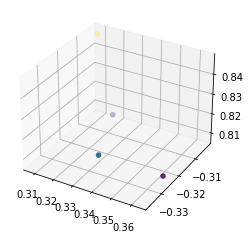

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = tvecs[:,2]
ydata = tvecs[:,1]
xdata = tvecs[:,0]
ax.scatter3D(xdata, ydata, zdata, c=zdata)

In [142]:
from skimage.feature import corner_harris, peak_local_max, corner_peaks


def get_harris_corners(im, edge_discard=20):
    """
    This function takes a b&w image and an optional amount to discard
    on the edge (default is 5 pixels), and finds all harris corners
    in the image. Harris corners near the edge are discarded and the
    coordinates of the remaining corners are returned. A 2d array (h)
    containing the h value of every pixel is also returned.

    h is the same shape as the original image, im.
    coords is 2 x n (ys, xs).
    """

    assert edge_discard >= 20

    # find harris corners
    h = corner_harris(im, method='eps', sigma=10)
    #vid 1
    coords = corner_peaks(h, min_distance=7, indices=True)
    # vid2
#     coords = peak_local_max(h, min_distance=25, indices=True)

    # discard points on edge
    edge = edge_discard  # pixels
    mask = (coords[:, 0] > edge) & \
           (coords[:, 0] < im.shape[0] - edge) & \
           (coords[:, 1] > edge) & \
           (coords[:, 1] < im.shape[1] - edge)
    coords = coords[mask].T
    return h, coords


def dist2(x, c):
    """
    dist2  Calculates squared distance between two sets of points.

    Description
    D = DIST2(X, C) takes two matrices of vectors and calculates the
    squared Euclidean distance between them.  Both matrices must be of
    the same column dimension.  If X has M rows and N columns, and C has
    L rows and N columns, then the result has M rows and L columns.  The
    I, Jth entry is the  squared distance from the Ith row of X to the
    Jth row of C.

    Adapted from code by Christopher M Bishop and Ian T Nabney.
    """
    
    ndata, dimx = x.shape
    ncenters, dimc = c.shape
    assert dimx == dimc, 'Data dimension does not match dimension of centers'

    return (np.ones((ncenters, 1)) * np.sum((x**2).T, axis=0)).T + \
            np.ones((   ndata, 1)) * np.sum((c**2).T, axis=0)    - \
            2 * np.inner(x, c)




In [143]:
def show_harris(video):
    h_scores, h_coords = get_harris_corners(rgb2gray(video[0]))
    plt.figure(figsize=(15,15))
    plt.imshow(video[0])
    plt.scatter(h_coords[1], h_coords[0])
    for i in range(h_coords.shape[1]):
        plt.annotate(i, (h_coords[1][i], h_coords[0][i]), color='yellow')
    return h_coords

1228


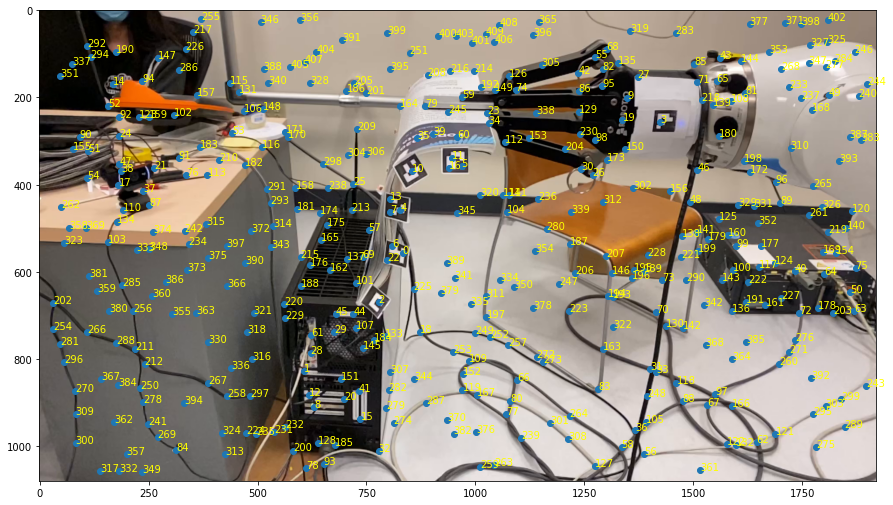

In [149]:
video = vread('slow_mo.MOV')
print(len(video))

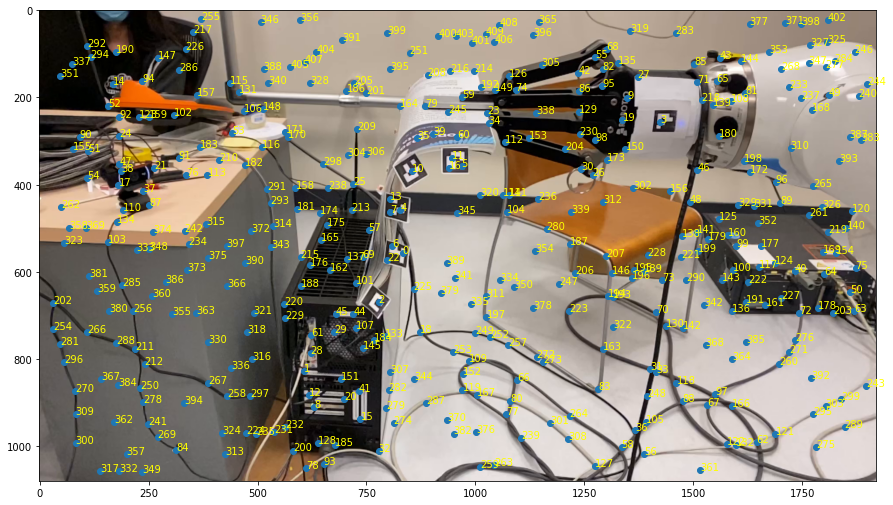

In [150]:
h_coords = show_harris(video)

In [ ]:
def track(video, initial_pt):
    frame = video[0]
#     tracker = cv2.TrackerMedianFlow_create()
    tracker = cv2.legacy.TrackerMedianFlow_create()
    points = [tuple(initial_pt)]
    bbox_size = 10
    bbox = (initial_pt[1]-bbox_size//2, initial_pt[0]-bbox_size//2, bbox_size, bbox_size)
    ok = tracker.init(frame, bbox)
    for i in range(len(video)):
        ok, bbox = tracker.update(video[i])
        if not ok:
            print("tracking failure")
            raise ValueError
        points.append((bbox[1] + 4, bbox[0] + 4))
    return points